# Question 3 - How does the number of people flying between different locations change over time?

## Importing Packages

In [1]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Datasets

In [2]:
# Importing the main cleaned dataset
cleaned_df = pd.read_csv("Files/Cleaned_Dataset.csv")
# Importing the Airports dataset
airports_df = pd.read_csv("Files/airports.csv")

In [3]:
# Changing the setting to show all columns and showing first and last 5 rows pf the main dataset
pd.set_option("display.max_columns", None)
cleaned_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268890,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,0,0
14268891,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,0,0
14268892,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,0,0,15,0,0
14268893,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,0,0,36


In [4]:
# Showing first and last 5 rows pf the airport dataset
airports_df.head(-5)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3366,Z55,Lake Louise,Lake Louise,AK,USA,62.293689,-146.579422
3367,Z73,Nelson Lagoon,Nelson Lagoon,AK,USA,56.007536,-161.160367
3368,Z84,Clear,Clear A.F.B.,AK,USA,64.301204,-149.120144
3369,Z91,Birch Creek,Birch Creek,AK,USA,66.273996,-145.824038


In [5]:
# Checking for any duplicated rows in the Airports Dataset
airports_df[airports_df.duplicated()]

,iata,airport,city,state,country,lat,long


In [6]:
# Checking for null values in the airports dataset
airports_df.isnull().sum()

iata        0
airport     0
city       12
state      12
country     0
lat         0
long        0
dtype: int64

In [7]:
# Removing all rows with null values in the airports dataset and checking if they have been removed
airports_df = airports_df.dropna(axis = 0)
airports_df.isnull().sum()

iata       0
airport    0
city       0
state      0
country    0
lat        0
long       0
dtype: int64

##### States will be used to compare how flights change between locations

In [8]:
# Filtering to keep only the neccessary columns in the main dataset
cleaned_df = cleaned_df.filter(["Year", "Origin", "Dest"], axis = 1)
cleaned_df

,Year,Origin,Dest
0,2006,ATL,PHX
1,2006,ATL,PHX
2,2006,ATL,PHX
3,2006,AUS,PHX
4,2006,AUS,PHX
...,...,...,...
14268890,2007,MCO,ATL
14268891,2007,ATL,SLC
14268892,2007,LAX,ATL
14268893,2007,DFW,ATL


In [9]:
# Filtering to keep only the neccessary columns in the airports dataset
airports_df1 = airports_df.filter(["iata", "state"], axis = 1)
airports_df2 = airports_df.filter(["iata", "state"], axis = 1)

##### We need 2 sets of the filtered airports dataset to get both origin and destination state
##### airports_df1 will be used to get the origin state
##### airports_df2 will be used to get the destination state



In [10]:
# Renaming the columns in airports_df1
airports_df1.rename(columns= {"iata" : "Origin", "state" : "Origin_State"}, inplace = True)
airports_df1

,Origin,Origin_State
0,00M,MS
1,00R,TX
2,00V,CO
3,01G,NY
4,01J,FL
...,...,...
3371,ZEF,NC
3372,ZER,PA
3373,ZPH,FL
3374,ZUN,NM


In [11]:
# Renaming the columns in airports_df2
airports_df2.rename(columns= {"iata" : "Dest", "state" : "Destination_State"}, inplace = True)
airports_df2

,Dest,Destination_State
0,00M,MS
1,00R,TX
2,00V,CO
3,01G,NY
4,01J,FL
...,...,...
3371,ZEF,NC
3372,ZER,PA
3373,ZPH,FL
3374,ZUN,NM


In [12]:
# Merging airports_df1 and the main dataset to get the origin for each flight
merged_df = pd.merge(cleaned_df, airports_df1, on = "Origin")
merged_df

,Year,Origin,Dest,Origin_State
0,2006,ATL,PHX,GA
1,2006,ATL,PHX,GA
2,2006,ATL,PHX,GA
3,2006,ATL,DCA,GA
4,2006,ATL,DCA,GA
...,...,...,...,...
14258965,2007,ROW,DFW,NM
14258966,2007,PIR,MSP,SD
14258967,2007,PIR,JAX,SD
14258968,2007,PIR,MSP,SD


In [13]:
# Merging airports_df2 and the merged dataset to get the destination for each flight
merged_df = pd.merge(merged_df, airports_df2, on = "Dest")
merged_df

,Year,Origin,Dest,Origin_State,Destination_State
0,2006,ATL,PHX,GA,AZ
1,2006,ATL,PHX,GA,AZ
2,2006,ATL,PHX,GA,AZ
3,2006,ATL,PHX,GA,AZ
4,2006,ATL,PHX,GA,AZ
...,...,...,...,...,...
14249001,2007,SCC,BRW,AK,AK
14249002,2007,SCC,BRW,AK,AK
14249003,2007,SCC,BRW,AK,AK
14249004,2007,SCC,BRW,AK,AK


In [14]:
# Creating a new column "Route" that combines the Origin_State and Destination_State
merged_df["Route"] = merged_df["Origin_State"].str.cat(merged_df["Destination_State"].values, sep = " - ")
merged_df

,Year,Origin,Dest,Origin_State,Destination_State,Route
0,2006,ATL,PHX,GA,AZ,GA - AZ
1,2006,ATL,PHX,GA,AZ,GA - AZ
2,2006,ATL,PHX,GA,AZ,GA - AZ
3,2006,ATL,PHX,GA,AZ,GA - AZ
4,2006,ATL,PHX,GA,AZ,GA - AZ
...,...,...,...,...,...,...
14249001,2007,SCC,BRW,AK,AK,AK - AK
14249002,2007,SCC,BRW,AK,AK,AK - AK
14249003,2007,SCC,BRW,AK,AK,AK - AK
14249004,2007,SCC,BRW,AK,AK,AK - AK


In [15]:
# Filtering to keep only the required columns
merged_df = merged_df.filter(["Year", "Route"], axis = 1)
merged_df

,Year,Route
0,2006,GA - AZ
1,2006,GA - AZ
2,2006,GA - AZ
3,2006,GA - AZ
4,2006,GA - AZ
...,...,...
14249001,2007,AK - AK
14249002,2007,AK - AK
14249003,2007,AK - AK
14249004,2007,AK - AK


In [16]:
# Getting the count of each route and storing it in a new data frame
count_of_routes = merged_df["Route"].value_counts().to_frame()
count_of_routes

,Route
CA - CA,712570
TX - TX,515261
HI - HI,188554
AZ - CA,142508
CA - AZ,141501
...,...
IA - KS,1
RI - MA,1
WA - LA,1
MS - NY,1


In [17]:
# Resetting the index and renaming the columns
count_of_routes = count_of_routes.reset_index()
count_of_routes.columns = ["Route", "Count"]
count_of_routes

,Route,Count
0,CA - CA,712570
1,TX - TX,515261
2,HI - HI,188554
3,AZ - CA,142508
4,CA - AZ,141501
...,...,...
1357,IA - KS,1
1358,RI - MA,1
1359,WA - LA,1
1360,MS - NY,1


In [18]:
# Creating a list with only the top 20 most used routes
top20_routes = count_of_routes.head(20)["Route"].tolist()
top20_routes

['CA - CA',
 'TX - TX',
 'HI - HI',
 'AZ - CA',
 'CA - AZ',
 'CA - NV',
 'NV - CA',
 'GA - FL',
 'FL - GA',
 'TX - CA',
 'CA - TX',
 'NY - FL',
 'FL - NY',
 'TX - FL',
 'FL - TX',
 'CO - CA',
 'CA - CO',
 'CO - CO',
 'CA - WA',
 'WA - CA']

In [19]:
# Keeping entries in the merged dataset with the top 20 most used routes
merged_df = merged_df[merged_df["Route"].isin(top20_routes)]
merged_df

,Year,Route
21854,2006,CA - AZ
21855,2006,CA - AZ
21856,2006,CA - AZ
21857,2006,CA - AZ
21858,2006,CA - AZ
...,...,...
14209167,2007,CA - CA
14209168,2007,CA - CA
14209169,2007,CA - CA
14209170,2007,CA - CA


In [20]:
# Grouping the data by year and route and getting the count of how many flights were taken for a -
# - sepcific route for each year
route_counts = merged_df.groupby(["Year", "Route"]).size().reset_index(name = "Count")
route_counts

,Year,Route,Count
0,2006,AZ - CA,70836
1,2006,CA - AZ,70642
2,2006,CA - CA,349201
3,2006,CA - CO,36875
4,2006,CA - NV,65464
5,2006,CA - TX,54171
6,2006,CA - WA,34406
7,2006,CO - CA,37371
8,2006,CO - CO,36649
9,2006,FL - GA,63717


In [21]:
# Splitting the "route_counts" by years
y2006_df = route_counts[route_counts["Year"] == 2006]
y2007_df = route_counts[route_counts["Year"] == 2007]

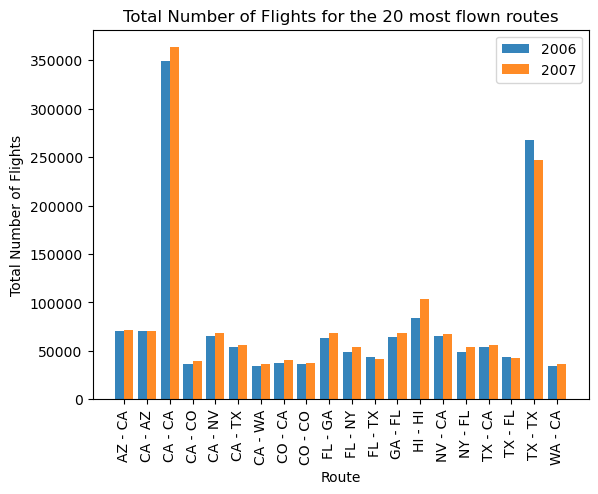

In [25]:
# Setting the positions on the x-axis for the bars of each year
x_positions_1 = range(len(y2006_df["Route"]))
x_positions_2 = [x + 0.4 for x in x_positions_1]

fig, ax = plt.subplots()

# Plotting the data for 2006
ax.bar(x_positions_1, y2006_df["Count"], width = 0.4, label = "2006", align = "center", alpha = 0.9)

# Plotting the data for 2007
ax.bar(x_positions_2, y2007_df["Count"], width = 0.4, label = "2007", align = "center", alpha = 0.9)

# Setting the x-axis tick positions and labels
bar_width = 0.4
ax.set_xticks([x + bar_width/2 for x in x_positions_1])
plt.xticks(rotation = 90)
ax.set_xticklabels(y2006_df["Route"])

# Adding labels for the axis labels and showing the legend
ax.set_xlabel("Route")
ax.set_ylabel("Total Number of Flights")
ax.legend()

# Setting the title of the plot
plt.title("Total Number of Flights for the 20 most flown routes")

# Saving the plot locally as a png
plt.savefig("Total Number of Flights for the 20 most flown routes.png")

# Showing the plot
plt.show()